# Figures

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

## ER-Decel Curve

In [2]:
# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

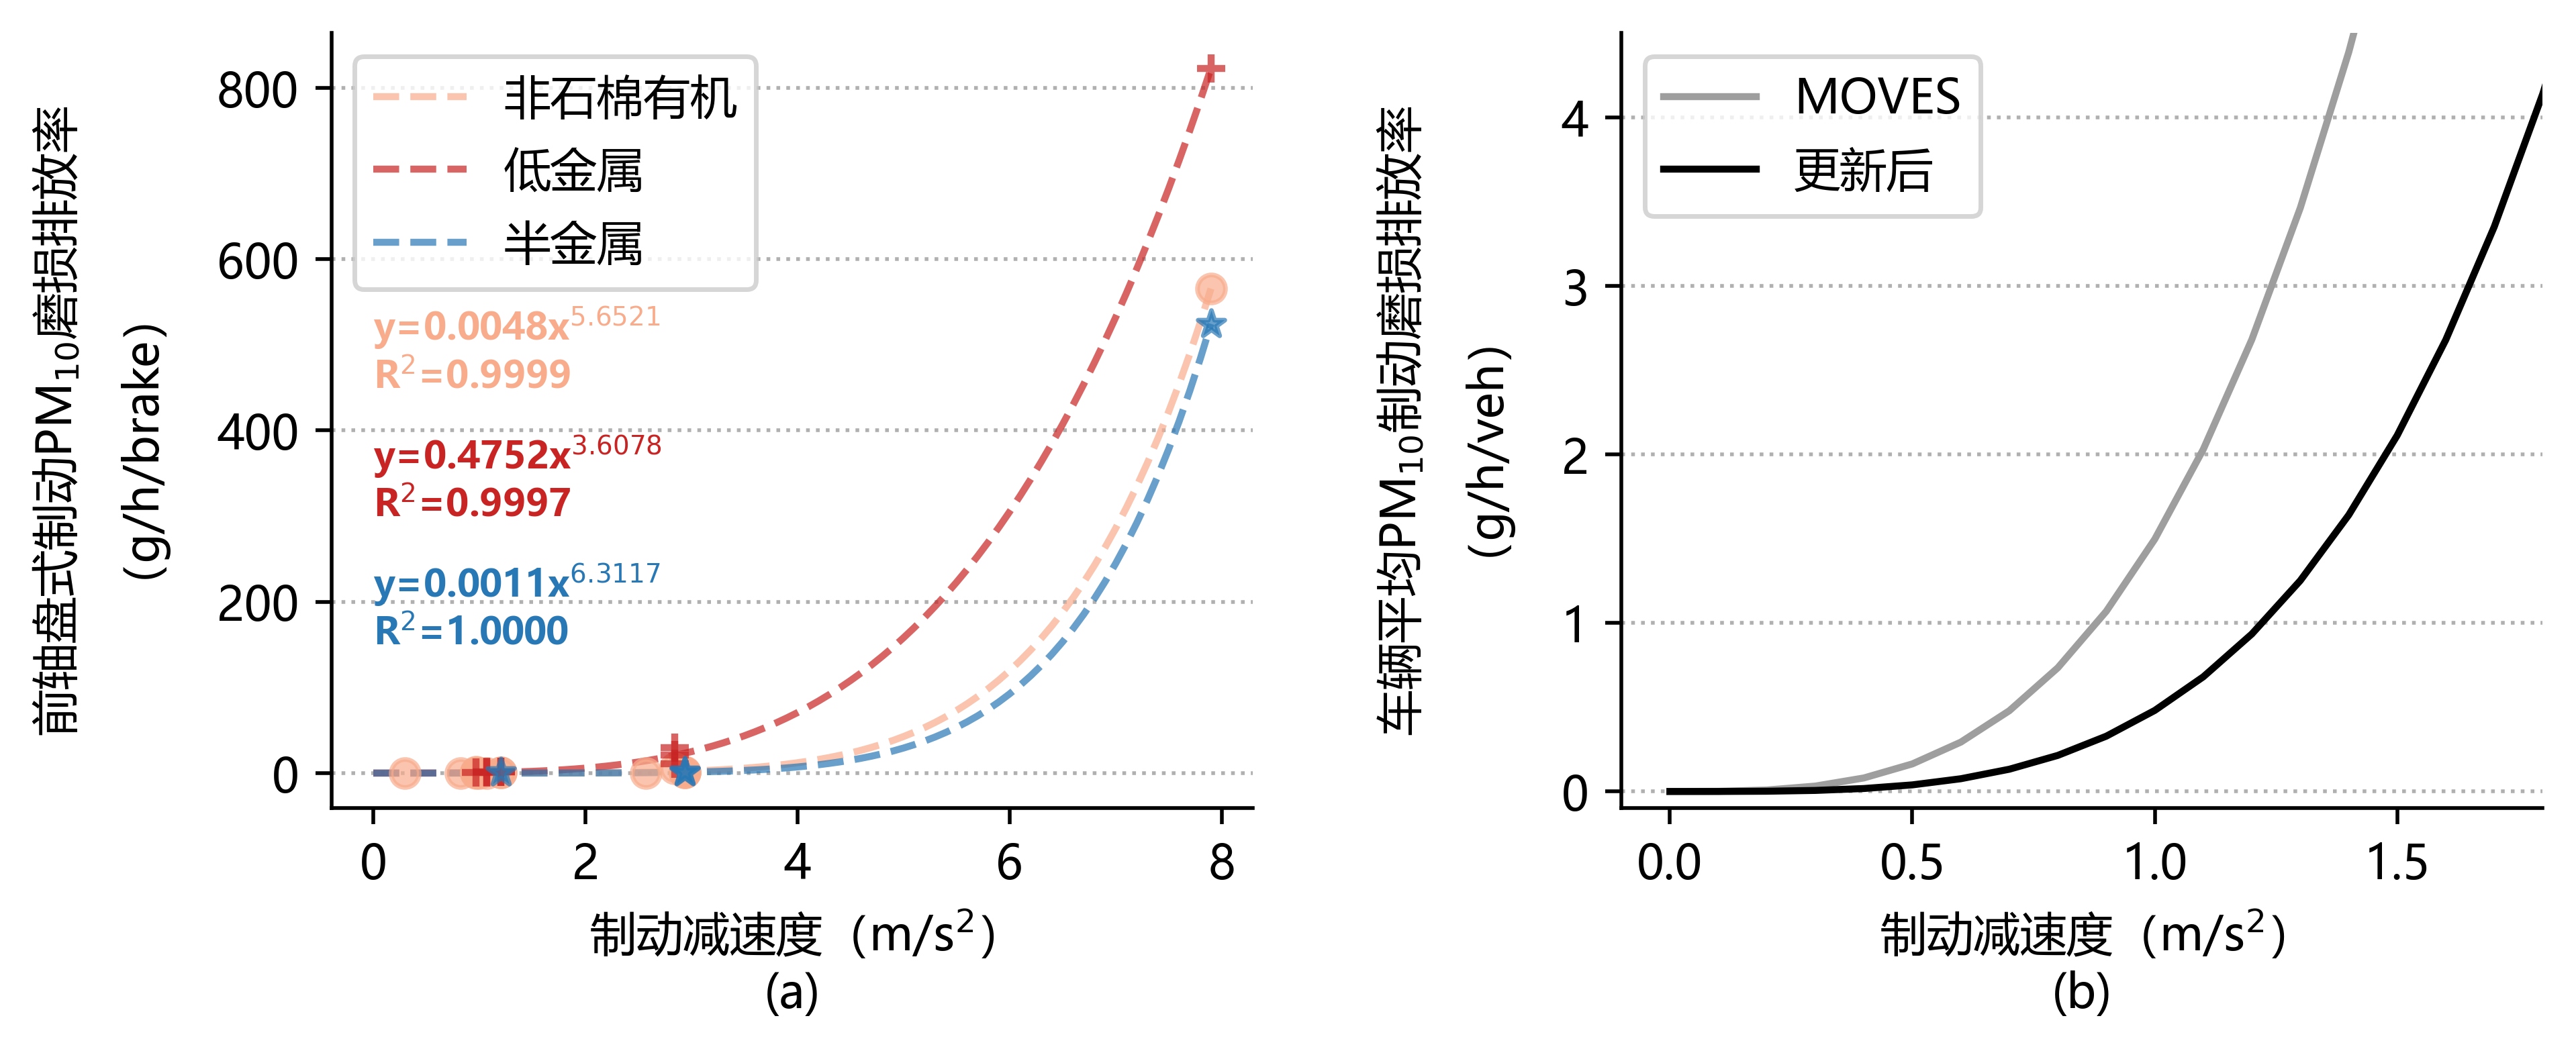

In [4]:
# comparison
fig, ax = plt.subplots(1, 2, figsize=(8.5,3))

decel = np.arange(0, 8, 0.1)
alpha = 0.7
LM_color, NAO_color, SM_color = RED, ORANGE, BLUE

# NAO
pred_pow = BWE.ER.calER(decel, "NAO")
ax[0].plot(decel, pred_pow, color=NAO_color, linestyle='--', alpha=alpha, label="非石棉有机", zorder=10)
ax[0].scatter(BWE.ER.NAO_PM10_ERs['Decel[m/s2]'], BWE.ER.NAO_PM10_ERs['PM10ER[g/hr/brake]'], color=NAO_color, marker="o", alpha=alpha, zorder=20)

# Low-M
pred_pow = BWE.ER.calER(decel, "LM")
ax[0].plot(decel, pred_pow, color=LM_color, linestyle='--', label="低金属", alpha=alpha, zorder=10)
ax[0].scatter(BWE.ER.LM_PM10_ERs['Decel[m/s2]'], BWE.ER.LM_PM10_ERs['PM10ER[g/hr/brake]'], color=LM_color, marker="+", alpha=alpha, zorder=20)

# Semi-M
pred_pow = BWE.ER.calER(decel, "SM")
ax[0].plot(decel, pred_pow, color=SM_color, linestyle='--', alpha=alpha, label="半金属", zorder=10)
ax[0].scatter(BWE.ER.SM_PM10_ERs['Decel[m/s2]'], BWE.ER.SM_PM10_ERs['PM10ER[g/hr/brake]'], color=SM_color, marker="*", alpha=alpha, zorder=20)

# MOVES
pred_pow = BWE.ER.calER(decel, "MOVES")
ax[1].plot(decel, pred_pow, color=GREY, label="MOVES", zorder=10)

# mix
pred_pow = BWE.ER.calER(
    decel, 'mix',
    prop_NAO_f=1/3, prop_LM_f=1/3, prop_SM_f=1/3,
    prop_NAO_r=1/3, prop_LM_r=1/3, prop_SM_r=1/3,
    prop_drum_f=0, prop_drum_r=0,
    r_f_ratio=0.5, drum_disc_ratio=0
)
ax[1].plot(decel, pred_pow, color='k', label="更新后", zorder=10)

# axis label
ax[0].set_xlabel("制动减速度（m/s$^2$）\n(a)")
ax[0].set_ylabel("前轴盘式制动PM$_{10}$磨损排放率\n（g/h/brake）\n")
ax[0].grid(axis='y', linestyle=':', zorder=0)
ax[0].legend()
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# zoom in
ax[1].set_xlim(-0.1,1.8)
ax[1].set_ylim(-0.1,4.5)
ax[1].grid(axis='y', linestyle=':', zorder=0)
ax[1].legend()
ax[1].set_xlabel("制动减速度（m/s$^2$）\n(b)")
ax[1].set_ylabel("车辆平均PM$_{10}$制动磨损排放率\n（g/h/veh）\n")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# #text
text_x, text_y, interval = 0, 450, 150
ax[0].text(text_x, text_y, "y=%.4fx$^{%.4f}$"%tuple(BWE.ER.NAO_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.NAO_POW_SCORE, fontsize=8, color=NAO_color, weight="bold")
ax[0].text(text_x, text_y-interval, "y=%.4fx$^{%.4f}$"%tuple(BWE.ER.LM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.LM_POW_SCORE, fontsize=8, color=LM_color, weight="bold")
ax[0].text(text_x, text_y-interval*2, "y=%.4fx$^{%.4f}$"%tuple(BWE.ER.SM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.SM_POW_SCORE, fontsize=8, color=SM_color, weight="bold")
# ax[1].text(text_x, text_y-interval*2.75, "MOVES: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.MOVES_POW_PARAM), fontsize=8, color=GREY, weight="bold")

plt.subplots_adjust(wspace=0.4)
plt.show()